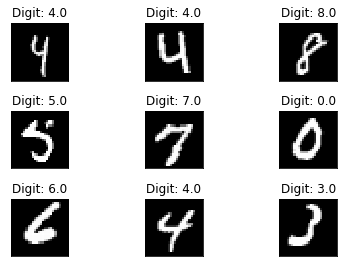

X_train shape: (49000, 784)
Number of images in X_train (49000, 784)
Number of images in X_test (21000, 784)
(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([4865, 5489, 4929, 4979, 4768, 4433, 4802, 5128, 4775, 4832]))
Shape before one-hot encoding:  (49000,)
Shape after one-hot encoding:  (49000, 10)


In [8]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# keras imports for the dataset and building our neural network
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

import pandas as pd
from sklearn.model_selection import train_test_split


#Data-preparation

images = np.loadtxt("handwritten_digits_images.csv", delimiter=',')
labels = np.loadtxt("handwritten_digits_labels.csv", delimiter=',')

x = images.reshape(images.shape[0], 28, 28)

X_train, X_test, y_train, y_test = train_test_split(x, labels,test_size=0.3, random_state=32)

# Just to show some images from the training_set
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
  
plt.show()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(49000, 784)
X_test = X_test.reshape(21000, 784)

# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape)
print('Number of images in X_test', X_test.shape)

print(np.unique(y_train, return_counts=True))
#Then we have to encode the labels in a vector composed by all zero's except in the position for the respective category 

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


In [9]:
# Building the network
# building a linear stack of layers with the sequential model

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Train on 49000 samples, validate on 21000 samples
Epoch 1/20
 - 3s - loss: 0.0148 - acc: 0.9950 - val_loss: 0.0807 - val_acc: 0.9837
Epoch 2/20
 - 3s - loss: 0.0140 - acc: 0.9955 - val_loss: 0.0954 - val_acc: 0.9806
Epoch 3/20
 - 3s - loss: 0.0132 - acc: 0.9959 - val_loss: 0.0867 - val_acc: 0.9810
Epoch 4/20
 - 3s - loss: 0.0141 - acc: 0.9959 - val_loss: 0.0897 - val_acc: 0.9816
Epoch 5/20
 - 3s - loss: 0.0123 - acc: 0.9957 - val_loss: 0.0923 - val_acc: 0.9828
Epoch 6/20
 - 3s - loss: 0.0139 - acc: 0.9957 - val_loss: 0.0940 - val_acc: 0.9810
Epoch 7/20
 - 3s - loss: 0.0132 - acc: 0.9959 - val_loss: 0.0897 - val_acc: 0.9813
Epoch 8/20
 - 3s - loss: 0.0111 - acc: 0.9961 - val_loss: 0.0841 - val_acc: 0.9833
Epoch 9/20
 - 3s - loss: 0.0128 - acc: 0.9959 - val_loss: 0.0945 - val_acc: 0.9814
Epoch 10/20
 - 3s - loss: 0.0107 - acc: 0.9967 - val_loss: 0.0968 - val_acc: 0.9822
Epoch 11/20
 - 3s - loss: 0.0138 - acc: 0.9958 - val_loss: 0.0940 - val_acc: 0.9818
Epoch 12/20
 - 3s - loss: 0.0121 - 

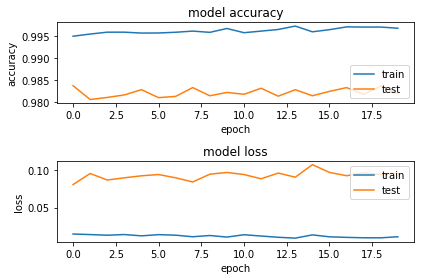

In [11]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()

In [12]:
#Evaluating the model

loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss)
print("Test Accuracy", accuracy)

Test Loss 0.09610387662826703
Test Accuracy 0.9818571428571429



20619  classified correctly
381  classified incorrectly


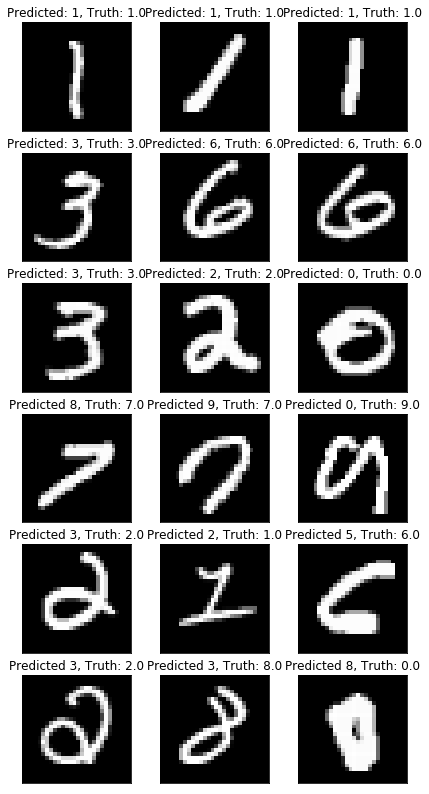

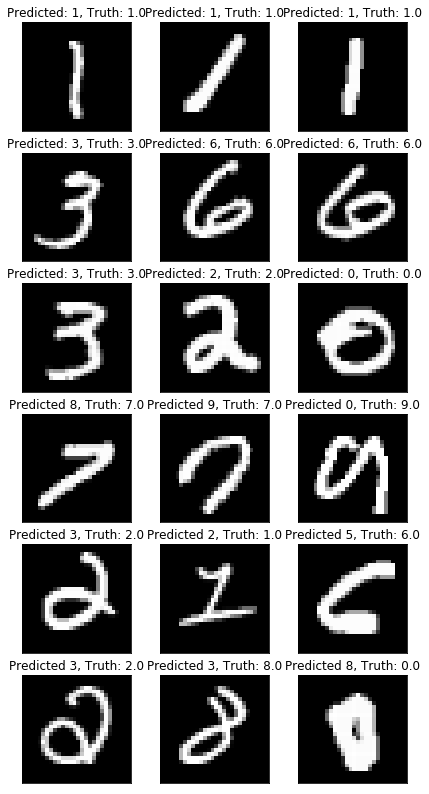

In [14]:
# Doing predictions

predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not ----- Indices of elements that are non-zero.

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation